使用pytorch的低阶API 实现线性回归模型和DNN二分类模型，低阶 API 主要包括张量操作，计算图和自动微分

In [2]:
import os
import datetime

#打印时间
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)

#mac系统上pytorch和matplotlib在jupyter中同时跑需要更改环境变量
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 


## 一、线性回归模型
### 1. 准备数据

In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn

In [4]:
n = 400

# 生成测试使用数据集
X = 10 * torch.rand([n, 2]) - 5.0 
w0 = torch.tensor([[2.0], [-3.0]])
b0 = torch.tensor([[10.0]])

Y = X@w0 + b0 + torch.normal(.0, 2.0, size=[n, 1])

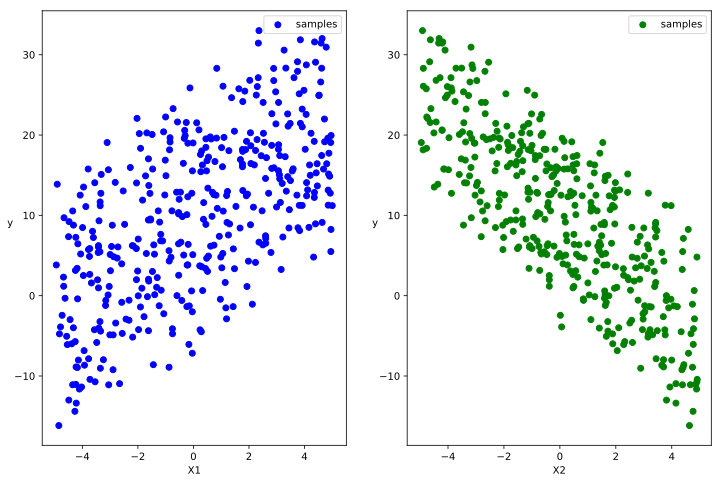

In [15]:
# 数据可视化
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


plt.figure(facecolor='w', figsize=(12, 8))
plt.subplot(121)
plt.scatter(X[:, 0].numpy(), Y[:, 0].numpy(), c='b', label='samples')
plt.legend()
plt.xlabel('X1')
plt.ylabel('y',rotation=0)

plt.subplot(122)
plt.scatter(X[:, 1].numpy(), Y[:, 0].numpy(), c='g', label='samples')
plt.xlabel('X2')
plt.ylabel('y', rotation=0)

plt.legend()
plt.show()

In [17]:
# 构建数据管道迭代器
def data_iter(features, labels, batch_size=8):
    num_examples = len(features)
    indices = list(range(num_examples))
    np.random.shuffle(indices)   # 打乱样本顺序
    for i in range(0, num_examples, batch_size):
        indexs = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, indexs), labels.index_select(0, indexs)
        

next(data_iter(X, Y))
    

(tensor([[ 0.4712, -2.3169],
         [-1.7784,  3.6967],
         [-3.6335, -1.6673],
         [-4.2259,  3.7076],
         [-1.2326,  3.0315],
         [-3.4827,  2.5957],
         [-2.8896,  3.7669],
         [-0.7563,  4.7775]]), tensor([[15.5377],
         [-2.6120],
         [ 8.0156],
         [-8.8691],
         [-1.2514],
         [-5.8276],
         [-4.8818],
         [-4.1165]]))